In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Read the dataframe and get their stastical information.


In [2]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.shape

(30, 2)

The dataframe consists of only 30 rows and visually found no missiing data in the dataframe.

Thereby, isnul() missing value function is not required.


# Data_Visualization


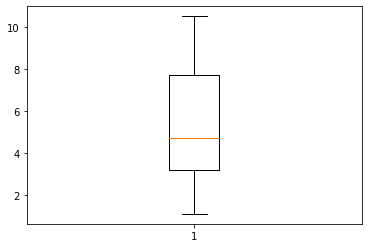

In [6]:
plt.boxplot(df.YearsExperience)
plt.show()

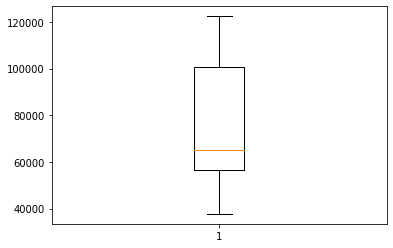

In [7]:
plt.boxplot(df.Salary)
plt.show()

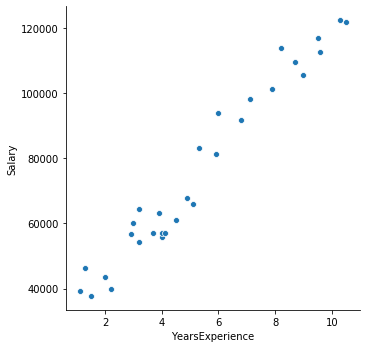

In [8]:
sns.pairplot(df, x_vars=['YearsExperience'], y_vars=['Salary'], height =5)

In [9]:
#normalizing the skwed data

def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))

df1 = df.apply(normalize)

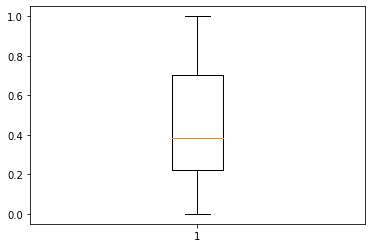

In [10]:
plt.boxplot(df1.YearsExperience)
plt.show()

In [11]:
df1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,0.448227,0.452067
std,0.301903,0.323818
min,0.000000,0.000000
25%,0.223404,0.224306
50%,0.382979,0.324900
75%,0.702128,0.741953
max,1.000000,1.000000


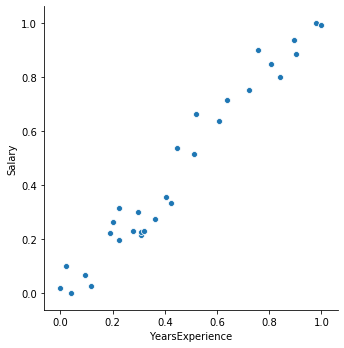

In [12]:
sns.pairplot(df1, x_vars=['YearsExperience'], y_vars=['Salary'], height =5)

In [13]:
X = df1['YearsExperience']

y = df1['Salary']

In [14]:
X.head()

0    0.000000
1    0.021277
2    0.042553
3    0.095745
4    0.117021
Name: YearsExperience, dtype: float64

In [15]:
y.head()

0    0.019041
1    0.100094
2    0.000000
3    0.068438
4    0.025514
Name: Salary, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=30)

In [17]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [18]:
X_train = X_train[ : ,np.newaxis]
X_test = X_test[:, np.newaxis]

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21, 1)
(21,)
(9, 1)
(9,)


In [20]:
#building  a machine learning model

from sklearn.linear_model import LinearRegression

lr= LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print(lr.coef_)
print(lr.intercept_)

[1.09328861]
-0.04277042699546485


In [22]:
y_pred= lr.predict(X_test)

Text(0, 0.5, 'Salary')

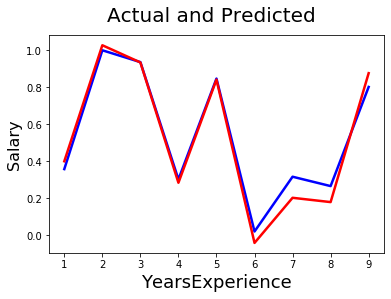

In [26]:
c = [i for i in range(1,10,1)]         
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)               
plt.xlabel('YearsExperience', fontsize=18)                               
plt.ylabel('Salary', fontsize=16)                       
                                                

Text(0, 0.5, 'ytest-ypred')

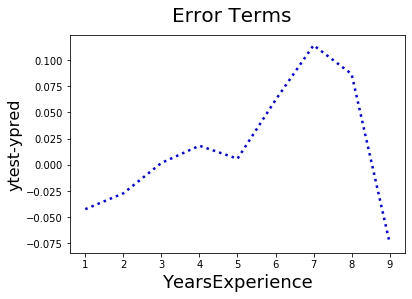

In [36]:
c = [i for i in range(1,10,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle=":")
fig.suptitle('Error Terms', fontsize=20)               
plt.xlabel('YearsExperience', fontsize=18)                      
plt.ylabel('ytest-ypred', fontsize=16)                

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)

In [29]:
r_squared = r2_score(y_test, y_pred)

In [30]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.003644864557900639
r_square_value : 0.9678098662339668


# Now we got our model ready with 96.78% accuracy.

Text(0, 0.5, 'Predicted Y')

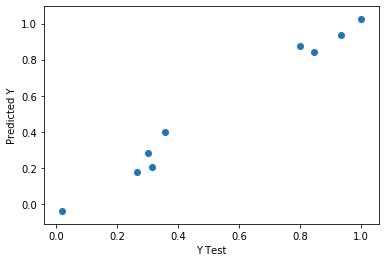

In [31]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')